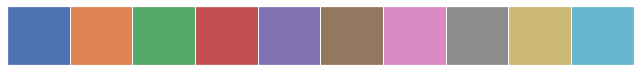

In [9]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set()
sns.palplot(sns.color_palette())

In [2]:
# Import data and clean tweets
df = pd.read_csv("covid19_tweets.csv")

# exTweet = "strive to promote Truth with Integrity. https://t.co/pOqdhk6Mhg"
def clean_tweet(text):
    ''' Remove links and symbols, make text lowercase'''
    text = text.lower()
    text = re.sub('http\S+', '', text)
    text = re.sub('[^0-9a-zA-Z ]+', '', text)
    return text

df['text_clean'] = df['text'].apply(str).apply(lambda x: clean_tweet(x))

In [12]:
# Get Sentiment from Vader
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df["Score"] = df["text_clean"].apply(lambda x: sid.polarity_scores(x)) 

# Obtain compound score and filter neutral scores
df['compoundScore'] = df["Score"].apply(lambda x: x['compound'])
df = df[(df['compoundScore']>0.01) | (df['compoundScore']<-0.01)]
df.compoundScore

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/caskla/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0        -0.4215
1         0.4215
2        -0.2732
3         0.7351
4         0.3182
           ...  
179102    0.1027
179104   -0.2263
179105    0.4215
179106    0.4215
179107    0.4215
Name: compoundScore, Length: 78718, dtype: float64

In [11]:
# Plot average score over time 
df['date'] = pd.to_datetime(df['date']).dt.date
dates = np.array(df['date'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df.groupby('date').mean()['compoundScore'])

ParserError: Unknown string format: USELESS

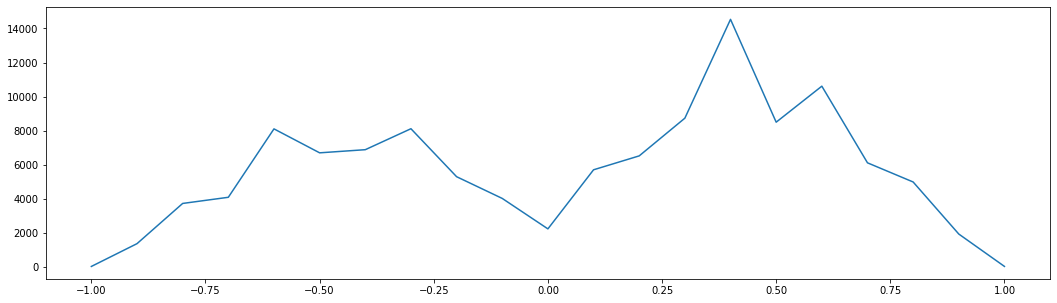

In [5]:
# Plot score distribution
df['roundedCompoundScore'] = df['compoundScore'].round(1)
plt.plot(df.groupby('roundedCompoundScore')['compoundScore'].count())

In [6]:
#Number of random locations listed
print("No. Of Original Unique Locations:",df["user_location"].nunique())
#dropping all null user locations
df.dropna(subset=['user_location'], inplace=True)

No. Of Original Unique Locations: 21102


In [7]:
# Generalizing Locations: making locations such as New York fall under the United States catagory
df.loc[df['user_location'].str.contains('India|Delhi', case=False)] = "India"
df.loc[df['user_location'].str.contains('USA|United States|DC|NY|CA|MA|MD|GA|TX|PA|WA|York|Texas|Los|Florida', case=False)] = "United States"
df.loc[df['user_location'].str.contains('Toronto', case=False)] = "Canada"
df.loc[df['user_location'].str.contains('England|UK|London', case=False)] = "United Kingdom"
df.loc[df['user_location'].str.contains('Nigeria', case=False)] = "Nigeria"
df.loc[df['user_location'].str.contains('China|Kong', case=False)] = "China"
df.loc[df['user_location'].str.contains('Australia', case=False)] = "Australia"
df.loc[df['user_location'].str.contains('Ireland', case=False)] = "Ireland"
df.loc[df['user_location'].str.contains('Switzerland', case=False)] = "Switzerland"
df.loc[df['user_location'].str.contains('Worldwide|WORLD|Earth|Global|Text|Europe', case=False)] = "USELESS"

#Number of locations after filtering out the excess
print("No. Of Unique Locations:",df["user_location"].nunique())

No. Of Unique Locations: 9533


/home/caskla/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


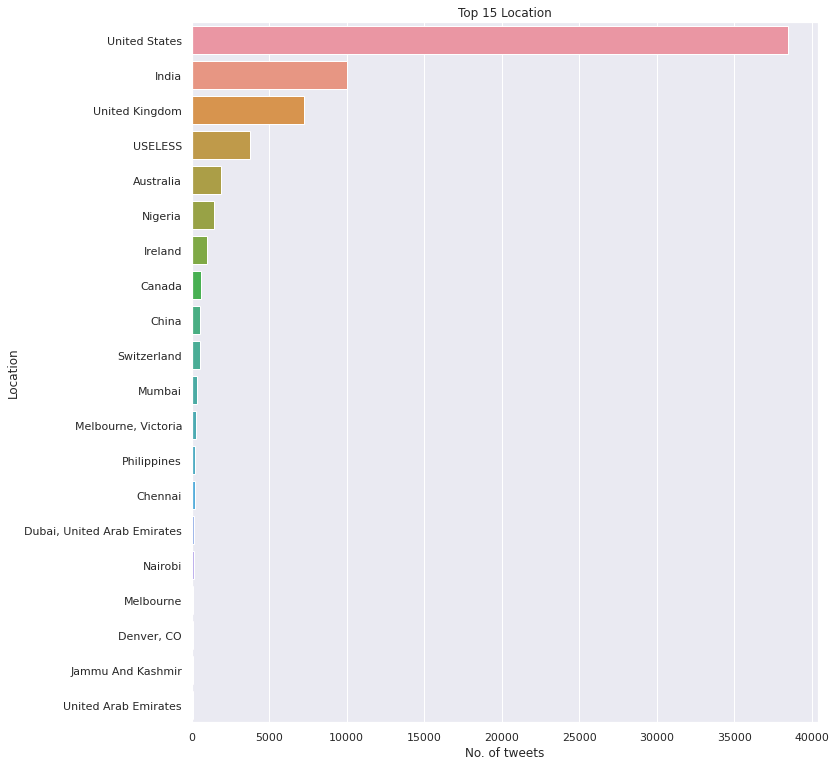

In [10]:
#graph of the top locations with the number of tweets in each respective country
plt.figure(figsize=(10,12))
sns.barplot(df["user_location"].value_counts().values[0:20],
            df["user_location"].value_counts().index[0:20]);
plt.title("Top 15 Location")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.show()